# Сборный проект

## План

1. Открыть файл и изучить общую информацию
2. Предобработка данных:
    1) заменить названия столбцов
    2) преобразовать данные в нужные типы
    3) обработать пропуски
    4) подсчитать суммарные продажи и записать их в новый столбец
3. Исследовательский анализ данных:
    1) проанализировать важность периодов по годам
    2) исследовать изнение продаж по платформам
    3) проанализировать рост и падение продаж платформ за актуальный период
    4) построить графики по глобальным продажам игр в разбивке по платформам
    5) оценить влияние отзывов пользователей и критиков на продажы внутри одной популярной платформы
    6) посмотреть общее распределение игр по жанрам
4. Составить портрет пользователя каждого региона:
    1) составить топ-5 платформ для каждого региона
    2) составить топ-5 жанров для каждого региона
    3) оценить влияние ESRB на продажы в отдельном регионе
5. Проверка гипотез:
    1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые
    2) средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
6. Сформулировать общий вывод

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

## Загрузка данных

In [2]:
try:
    data = pd.read_csv('../datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод по разделу

В данных замечены пропуски в колонках name, year_of_realease, genre, critic_score, user_score, rating. Также стоит изменить типы данных в колонках Year_of_Release и User_Score на int и float соответсвтенно и изменить названия колонок (привести к нижнему регистру)

## Предобработка данных

### Изменение названий колонок

In [6]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов колонок

Изменил тип Year_of_Release на int для оптимизации по памяти. (int выбрал потому, что в колонке нет информации о месяце и дне релиза и значит перевод в datetime не принесет пользы)

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int16')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int16(1), float64(5), object(5)
memory usage: 1.3+ MB


Значения tbd в колонке user_score обозначают пропуски как и NaN. Сначала заменим tbd на NaN и изменим тип на float. 

In [8]:
data['user_score'] = data['user_score'].replace({'tbd': None})
data['user_score'].value_counts()

7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
0.5      2
0.7      2
0.2      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [9]:
data['user_score'] = data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int16  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int16(1), float64(6), object(4)
memory usage: 1.3+ MB


* Типы в колонках year_of_release и user_score были изменены. 
* значения tbd в колонке user_store изменены на NaN

### Обработка пропусков

#### year_of_release

In [10]:
data['year_of_release'].isna().sum()

269

year_of_release имеет 269 пропусков. Заполнение пропусков какой-нибудь метрикой "размажет" данные, также пропуски не скажутся на результатах исследования, поэтому эти пропуски оставляем.

#### genre, name

In [11]:
data['genre'].isna().sum()

2

In [12]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Заполним эти пропуски значением unknown. Удалять их плохо (данные из других столбцов могут быть полезными при исследовании продаж по годам) и больше не чем заполнить.

In [13]:
data['genre'] = data['genre'].fillna('unknown')
data['name'] = data['name'].fillna('unknown')
display(data[data['genre'].isna()])
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Заполнение пропусков в оценке

Данные в этих колонках могут сильно повлиять на исследование и имеют до половины всей колонки пропусков, но заполнить эти пропуски какими-либо значениями, не повлияв на итоги исследования, тяжело, поэтому эти пропуски придется оставить.

In [14]:
display(data['critic_score'].isna().sum())
display(data['user_score'].isna().sum())
data['rating'].isna().sum()

8578

9125

6766

### Суммарные продажи

Создан столбец с суммой продаж по всем регионам

In [15]:
data['sum_sales'] = data['eu_sales'] + data['jp_sales'] + data['na_sales']

### Вывод по разделу

* Названия колонок приведены к нижнему регистру.
* В колонках user_score и year_of_release были изменены на float и int.
* В колонках genre, name пропуски были заполнены заглушкой 'unknown' в остальных колонках было решено пропуски оставить как есть.
* Добавлена колонка с суммой продаж по всем регионам.

## Исследовательский анализ

### Сколько игр выпускались в разные годы

In [16]:
data.groupby('year_of_release')['name'].agg('count').sort_values()

year_of_release
1980       9
1984      14
1985      14
1988      15
1990      16
1987      16
1989      17
1983      17
1986      21
1982      36
1991      41
1992      43
1981      46
1993      62
1994     121
1995     219
1996     263
1997     289
1999     338
2000     350
1998     379
2001     482
2016     502
2013     544
2014     581
2015     606
2012     653
2004     762
2003     775
2002     829
2005     939
2006    1006
2011    1136
2007    1197
2010    1255
2009    1426
2008    1427
Name: name, dtype: int64

<AxesSubplot:ylabel='year_of_release'>

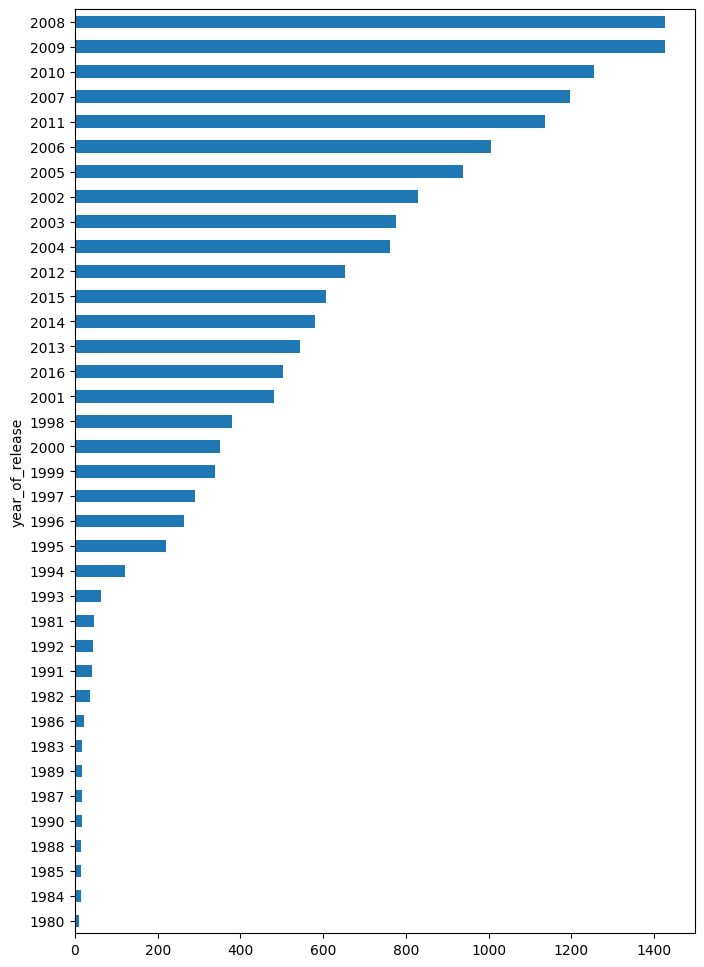

In [17]:
data.groupby('year_of_release')['name'].agg('count').sort_values().plot(kind='barh', figsize=(8,12))

Подавляющее большенство игр было выпущено после 2001 года.

### Продажи по платформам 

Платформы с наибольшими суммарными продажами

In [18]:
platforms = data.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False)[:10]
platforms

platform
PS2     1062.33
X360     885.66
Wii      828.44
PS3      803.97
DS       746.86
PS       689.95
GBA      310.12
PS4      265.79
PSP      252.63
XB       249.02
Name: sum_sales, dtype: float64

Распределение продаж по годам у самых популярных платформ

<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

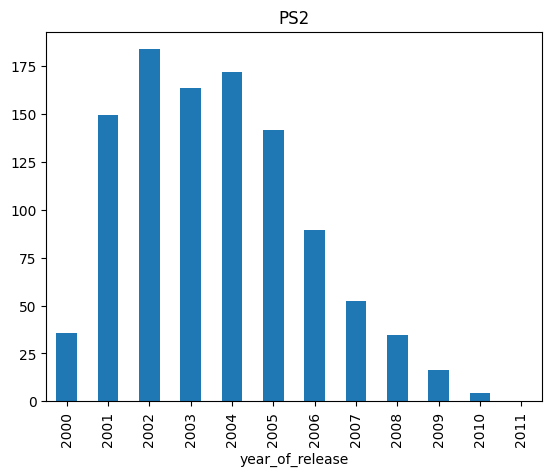

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

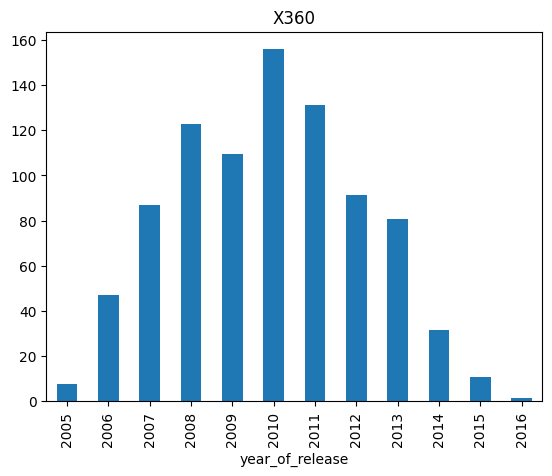

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

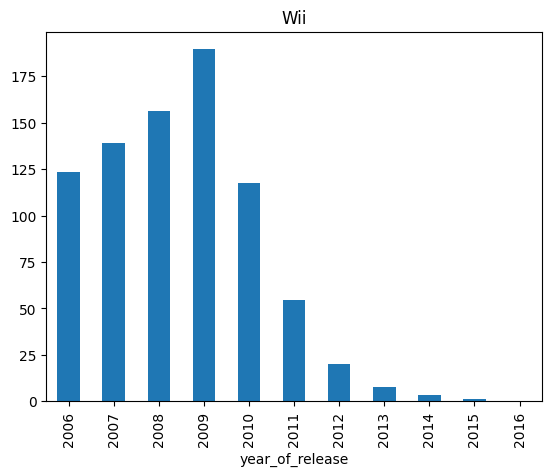

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

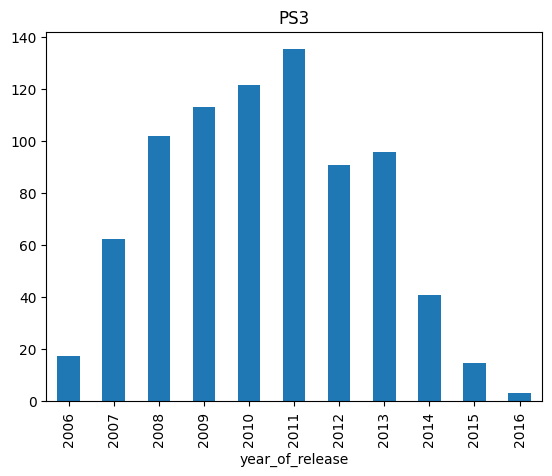

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

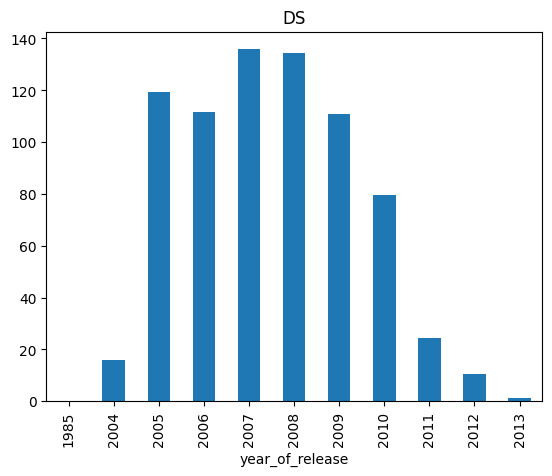

<AxesSubplot:title={'center':'PS'}, xlabel='year_of_release'>

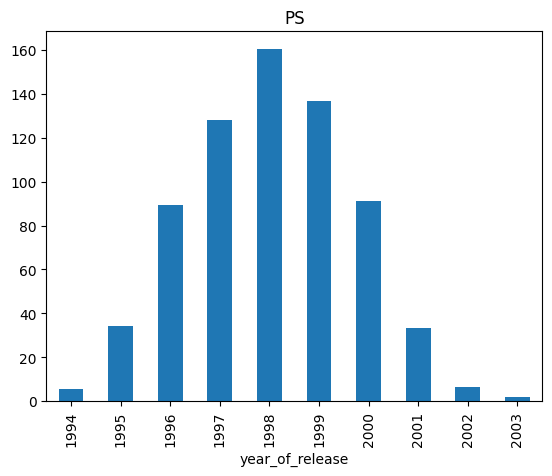

<AxesSubplot:title={'center':'GBA'}, xlabel='year_of_release'>

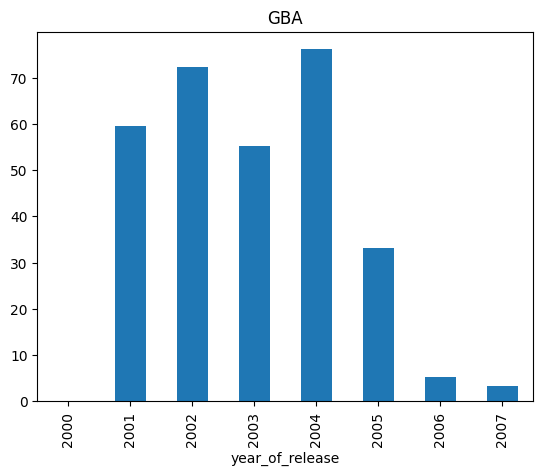

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release'>

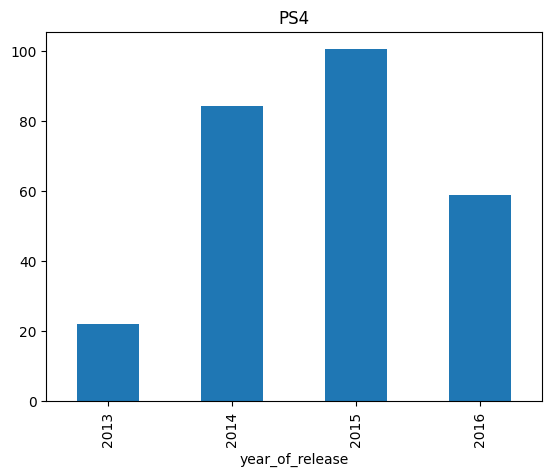

<AxesSubplot:title={'center':'PSP'}, xlabel='year_of_release'>

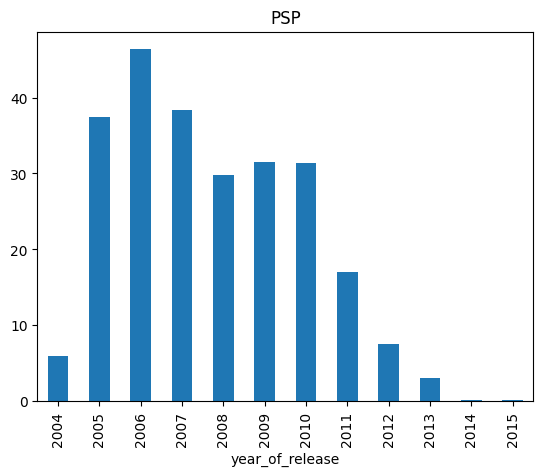

<AxesSubplot:title={'center':'XB'}, xlabel='year_of_release'>

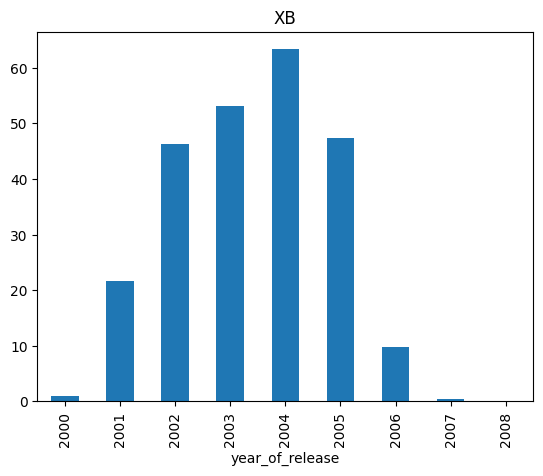

In [19]:
for t in platforms.index:
    display(data[data['platform'] == t].groupby('year_of_release')['sum_sales'].agg('sum').plot(kind='bar', title=t))
    plt.show()

По графикам можно сказать что платформы обычно "живут" примерно 10 лет, значит будем считать актуальным период в последнее десятилетие.

### Прогноз на 2017 год

Возмем данные за последние 10 лет (именно за ткоей срок обычно появляются новые и исчезают старые платформы) и построим прогноз на 2017 год.

In [20]:
relevant_data = data[(data['year_of_release'] <= 2016) & (data['year_of_release'] >= 2006)]

In [21]:
relevant_data.groupby('platform')['sum_sales'].agg('sum').sort_values(ascending=False)

platform
X360    868.75
Wii     813.47
PS3     796.75
DS      608.47
PS4     265.79
3DS     244.54
PSP     205.38
PS2     197.10
XOne    145.05
PC      144.77
WiiU     76.24
PSV      47.38
GC       11.27
XB       10.42
GBA       8.54
DC        0.06
Name: sum_sales, dtype: float64

<AxesSubplot:title={'center':'Wii'}, xlabel='year_of_release'>

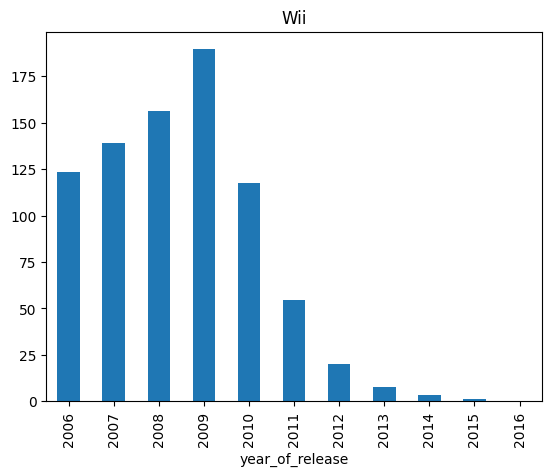

<AxesSubplot:title={'center':'DS'}, xlabel='year_of_release'>

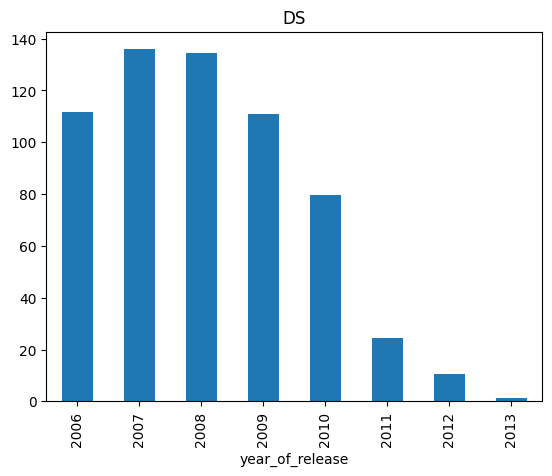

<AxesSubplot:title={'center':'X360'}, xlabel='year_of_release'>

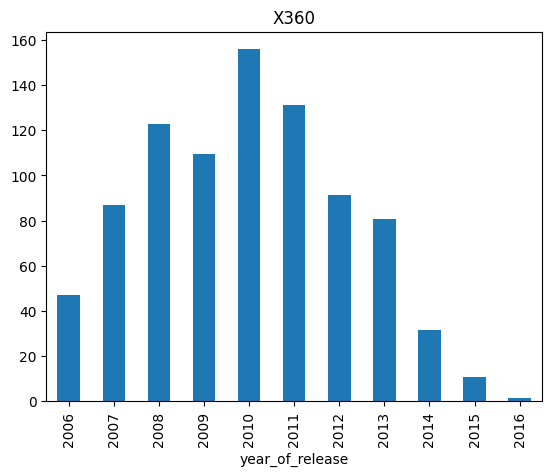

<AxesSubplot:title={'center':'PS3'}, xlabel='year_of_release'>

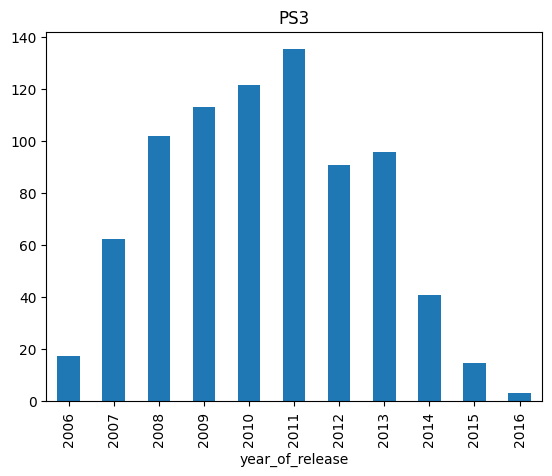

<AxesSubplot:title={'center':'PS4'}, xlabel='year_of_release'>

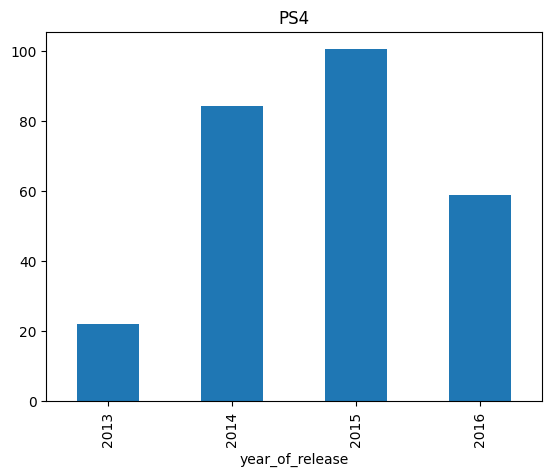

<AxesSubplot:title={'center':'3DS'}, xlabel='year_of_release'>

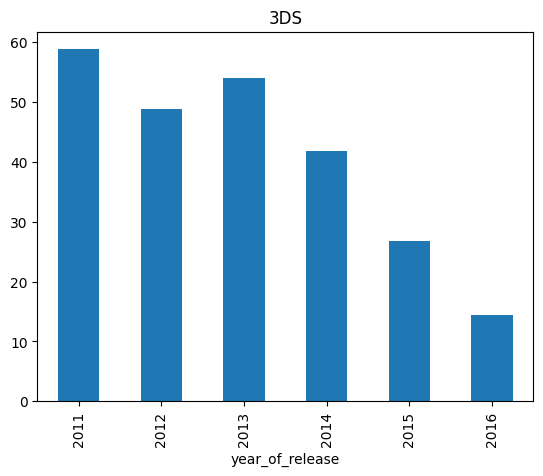

<AxesSubplot:title={'center':'PC'}, xlabel='year_of_release'>

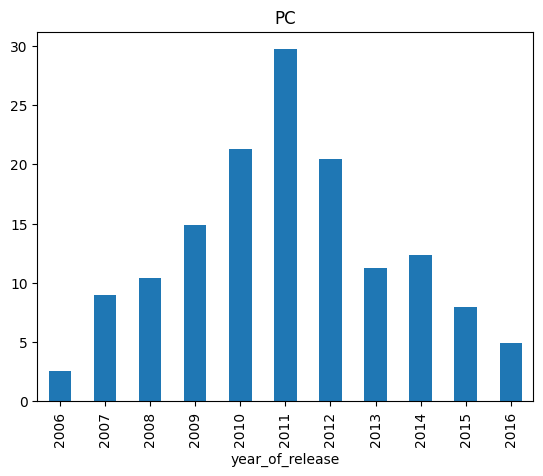

<AxesSubplot:title={'center':'XOne'}, xlabel='year_of_release'>

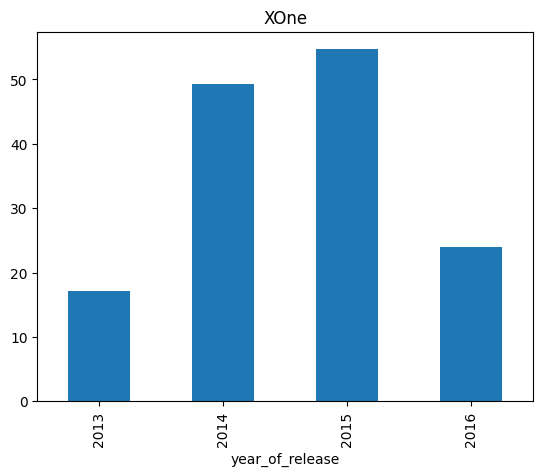

<AxesSubplot:title={'center':'WiiU'}, xlabel='year_of_release'>

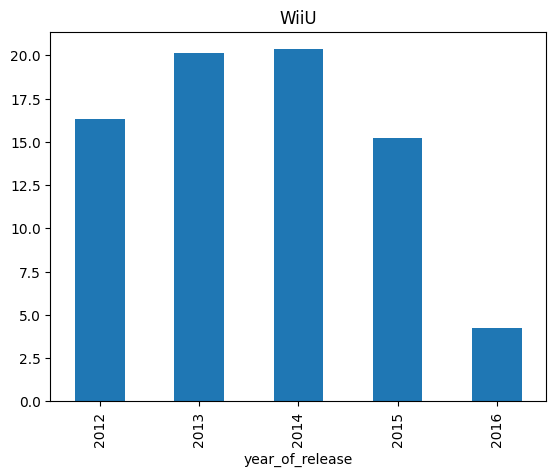

<AxesSubplot:title={'center':'PS2'}, xlabel='year_of_release'>

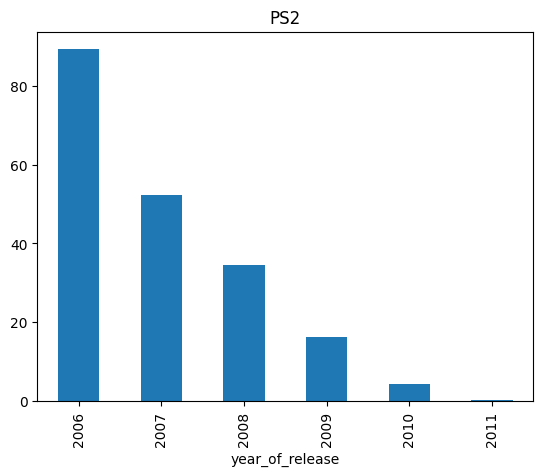

<AxesSubplot:title={'center':'PSP'}, xlabel='year_of_release'>

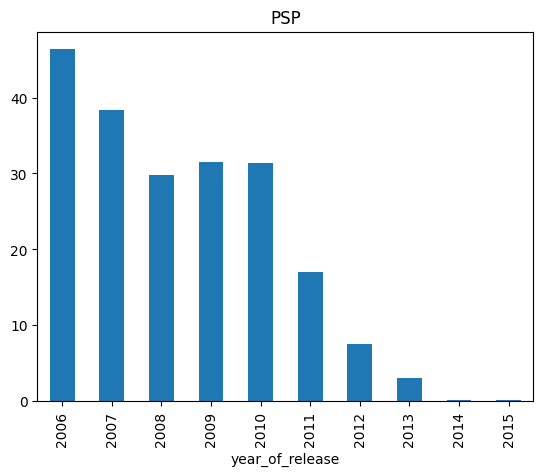

<AxesSubplot:title={'center':'PSV'}, xlabel='year_of_release'>

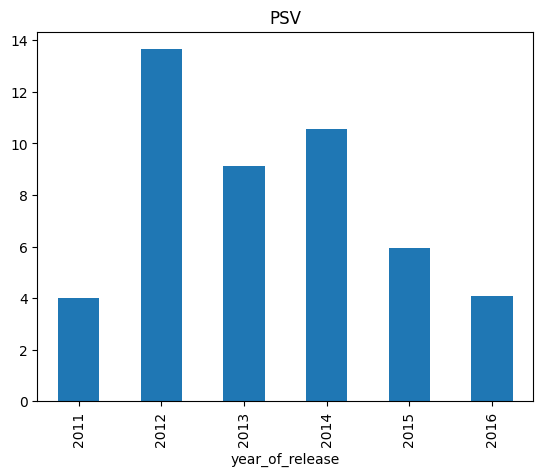

<AxesSubplot:title={'center':'GBA'}, xlabel='year_of_release'>

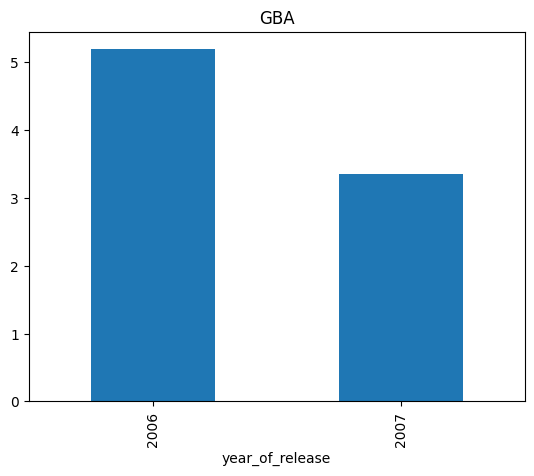

<AxesSubplot:title={'center':'GC'}, xlabel='year_of_release'>

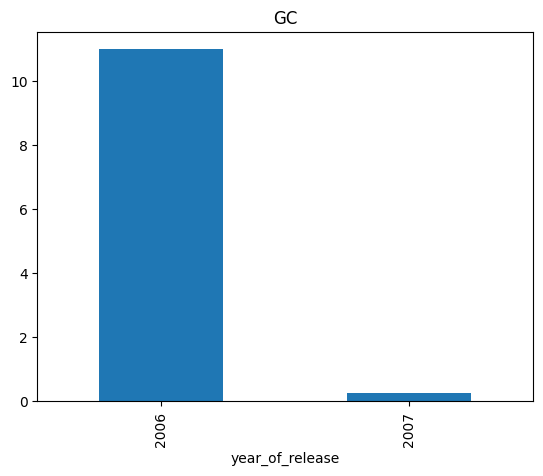

<AxesSubplot:title={'center':'XB'}, xlabel='year_of_release'>

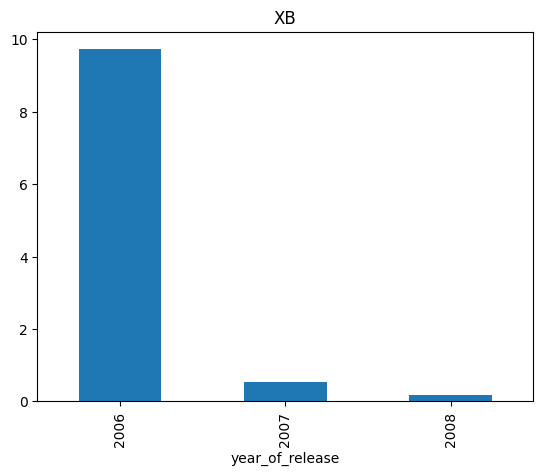

<AxesSubplot:title={'center':'DC'}, xlabel='year_of_release'>

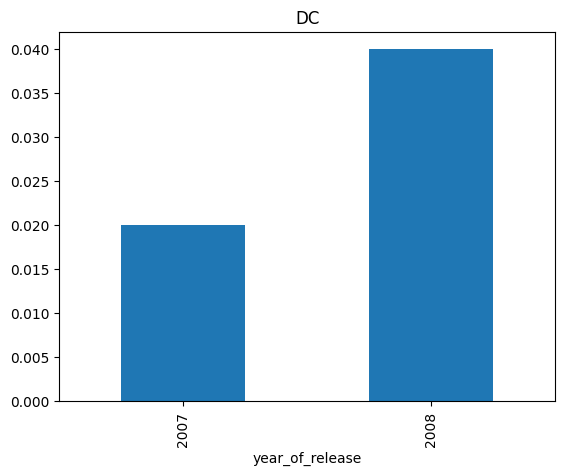

In [22]:
for t in relevant_data['platform'].unique():
    display(relevant_data[relevant_data['platform'] == t].groupby('year_of_release')['sum_sales'].agg('sum').plot(kind='bar', title=t))
    plt.show()

* Платформы DC, XB, GC, GBA, имеют данные только до 2008 года, значит они скорее всего уже прекратили свое существование.
* Лидирующие платформы за этот период: X360, Wii, PS3, DS, они же к последним годам периода падают по продажам (вместе с psp и pc).
* Рост наблюдается у платформ WIIU (однако коследние 2 года наблюдается небольшой спад), PSV (также наблюдается спад последние 2 года), XOne (последний год наблюдатеся спад), PS4 (также имеет спад в последний год)
* К концу периода спад наблюдается у всех платформ (если не рассматривать DC, XB, GC, GBA).
* Потенциально прибыльные платформы: PSV, WiiU, XOne, PC, 3DS, PS4.

### Диаграмма размаха по продажам игр в разбивке по платформам

In [23]:
relevant_data['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'XOne', 'WiiU',
       'PS2', 'PSP', 'PSV', 'GBA', 'GC', 'XB', 'DC'], dtype=object)

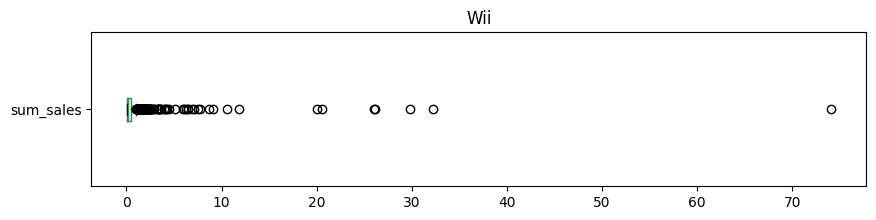

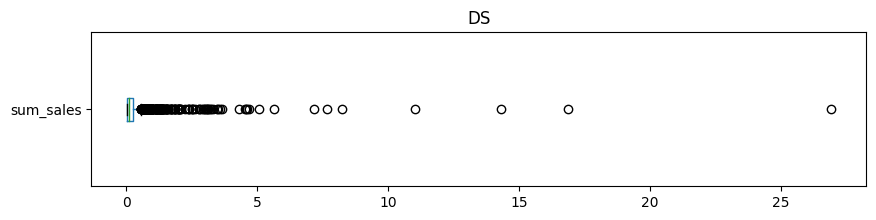

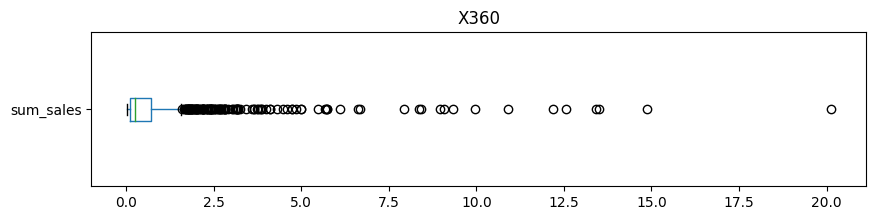

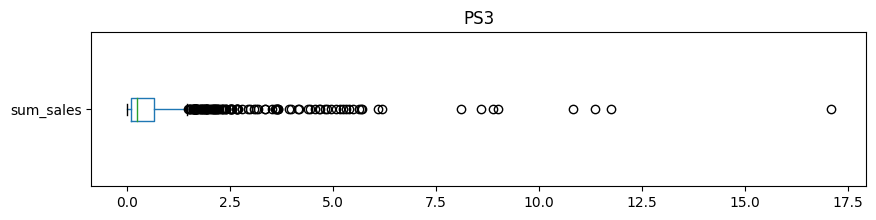

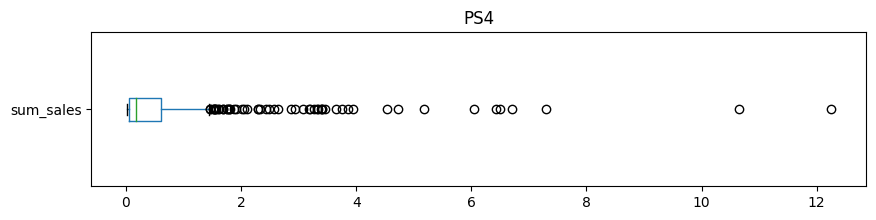

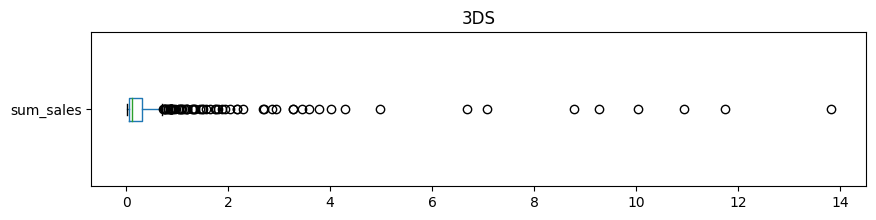

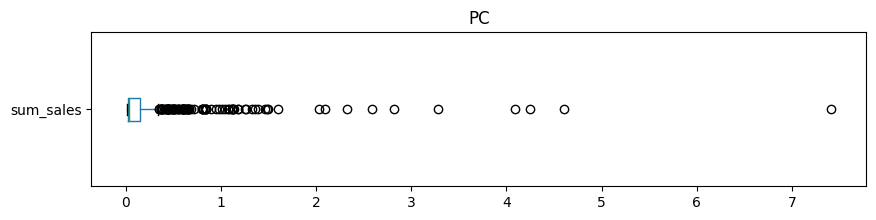

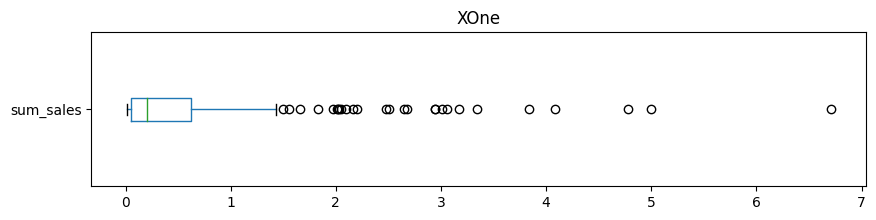

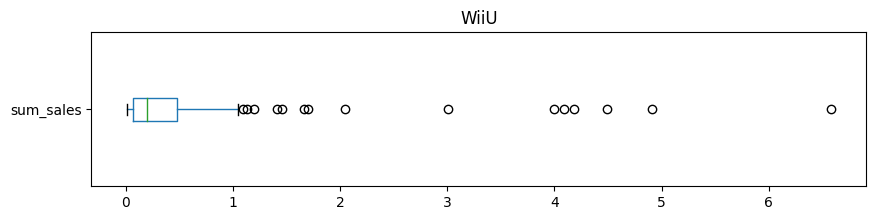

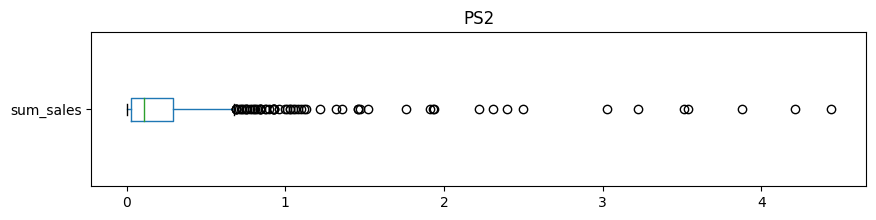

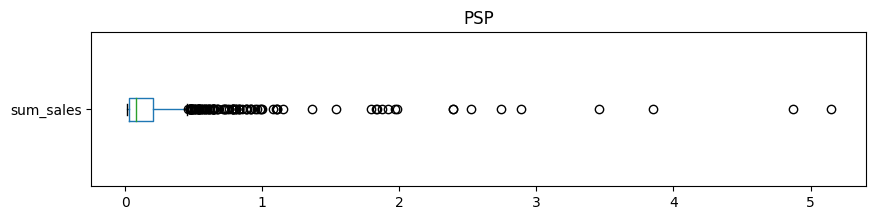

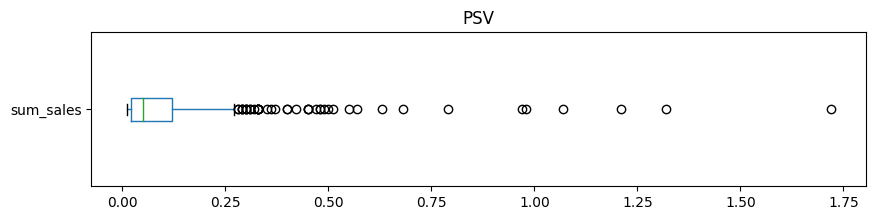

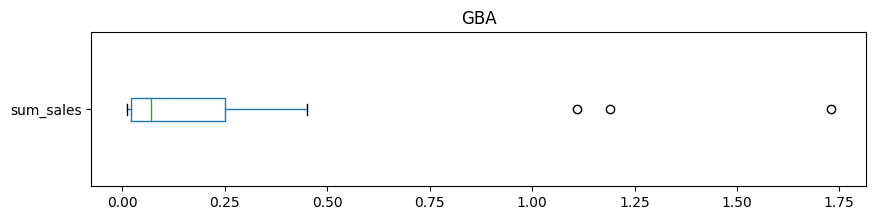

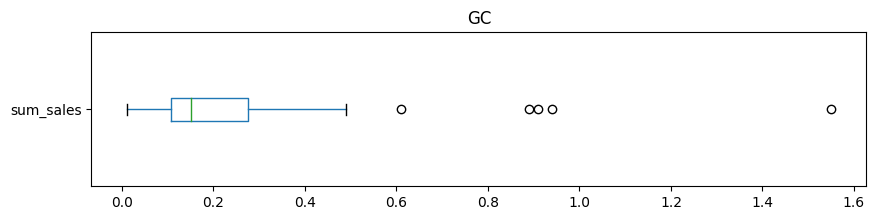

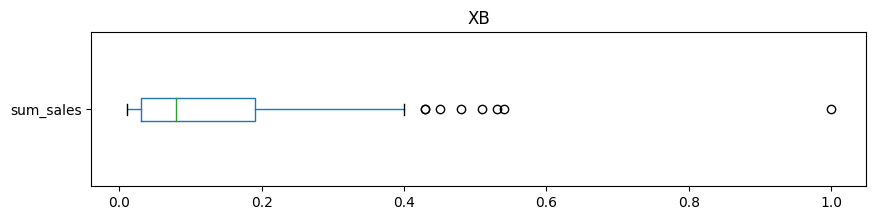

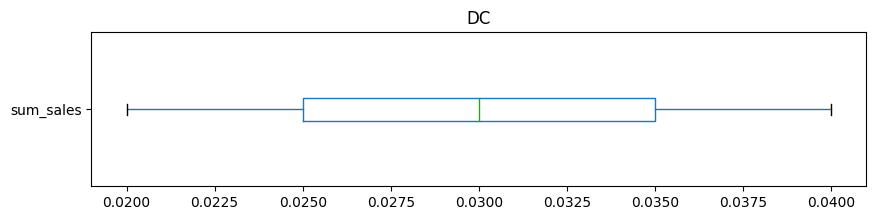

In [24]:
for t in relevant_data['platform'].unique():
    relevant_data[relevant_data['platform'] == t].plot(y='sum_sales', vert=False, figsize=(10,2), kind='box').set_title(t)
    plt.show()

* Обычно общие продажи игр ограничиваются 1 миллионом копий, значения выше на графиках отмечены как выбросы (скорее всего это единицы хорошо выстрелевших игр).
* Самые стабильные платформы: 'GBA', 'GC', 'XB', 'DC'
* Самые нестабильные платформы: 'Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'PS2', 'PSP'.

### Влияние отзывов на самой популярной платформе

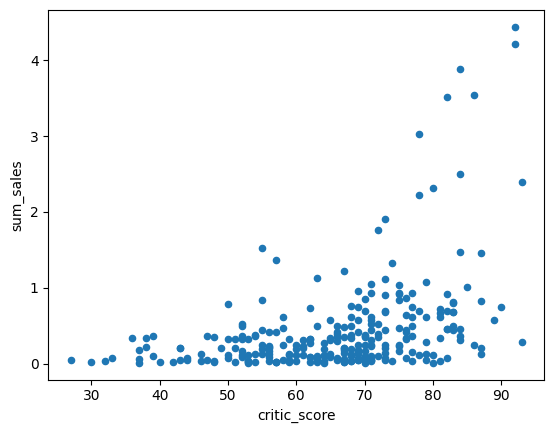

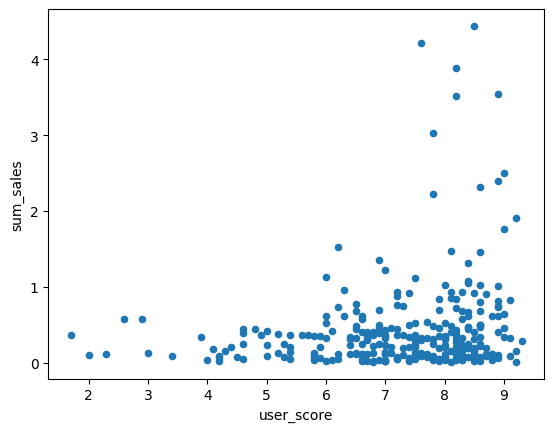

In [25]:
relevant_data[relevant_data['platform'] == 'PS2'].plot(y='sum_sales', x='critic_score', kind='scatter')
plt.show()
relevant_data[relevant_data['platform'] == 'PS2'].plot(y='sum_sales', x='user_score', kind='scatter')
plt.show()

In [26]:
display(relevant_data[relevant_data['platform'] == 'PS2']['sum_sales'].corr(relevant_data[relevant_data['platform'] == 'PS2']['critic_score']))
relevant_data[relevant_data['platform'] == 'PS2']['sum_sales'].corr(relevant_data[relevant_data['platform'] == 'PS2']['user_score'])

0.4258670670986992

0.20279008821607622

Графики и коэффикиент корреляции говорят о том, что либо зависимость очень слабая либо ее вообще нет между продажами и отзывами и отзывы критиков больше влияют на продаваемость чем отзывы пользователей.

### Влияние отзывов на  других платформах

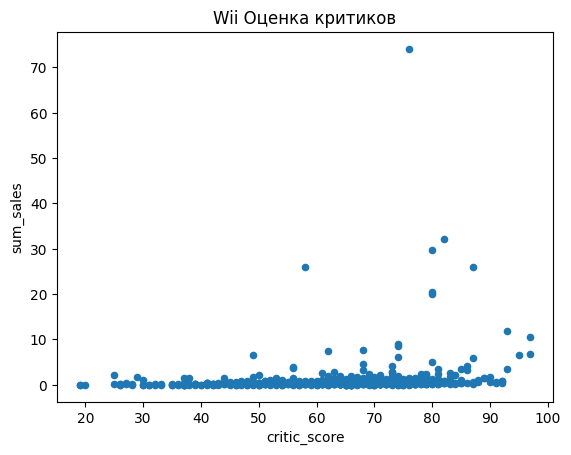

0.17946768303150826

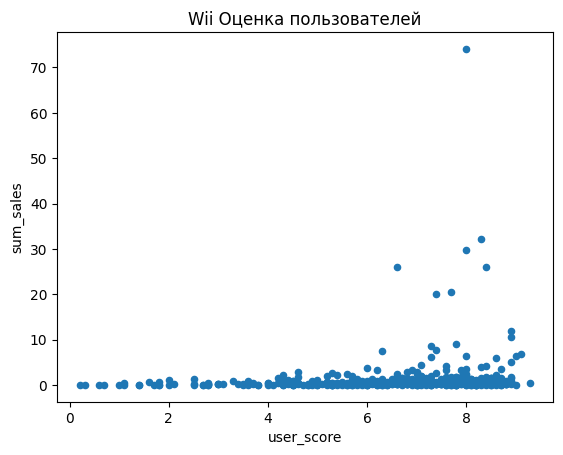

0.11375325972327716

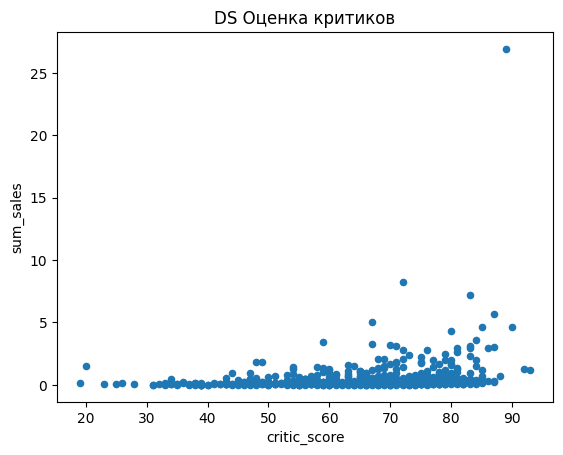

0.23676191317186981

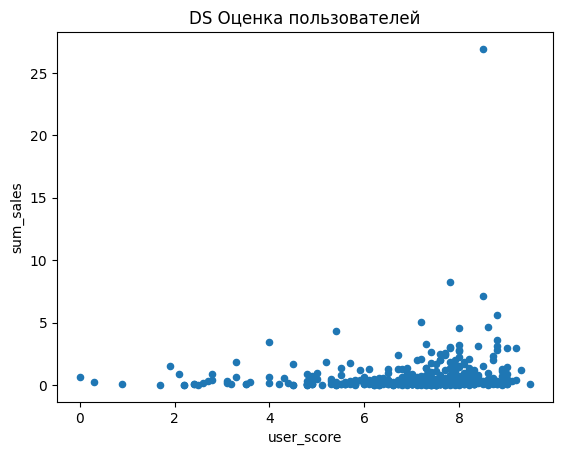

0.12329724422729786

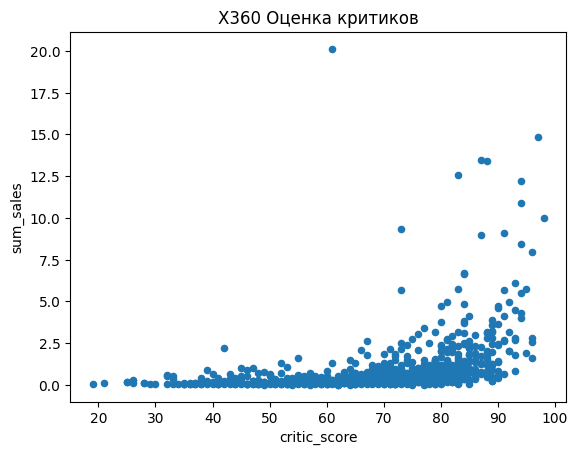

0.3950942847833007

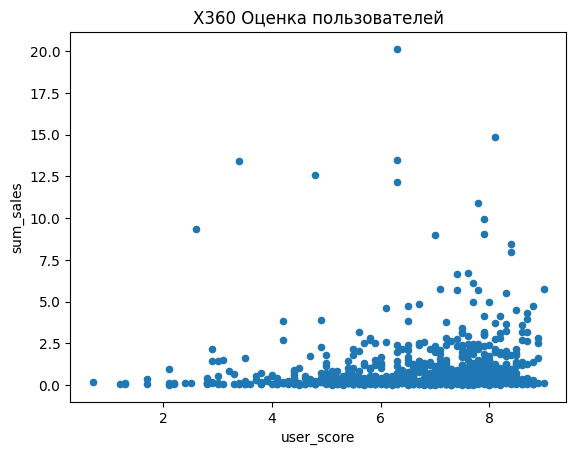

0.11483099521702624

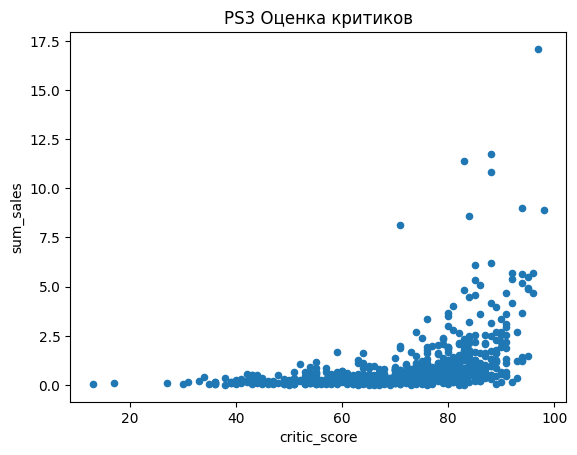

0.43775420924462494

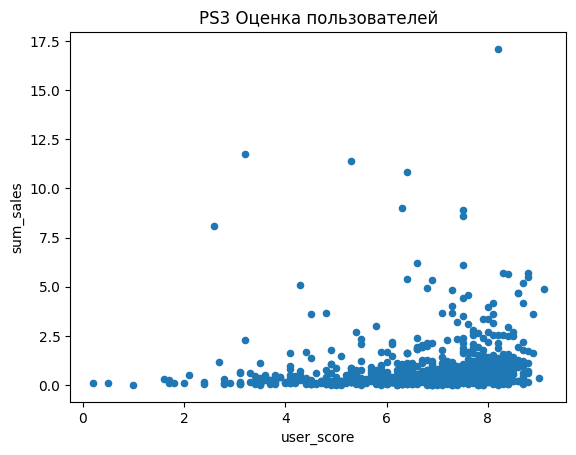

0.13102850147543937

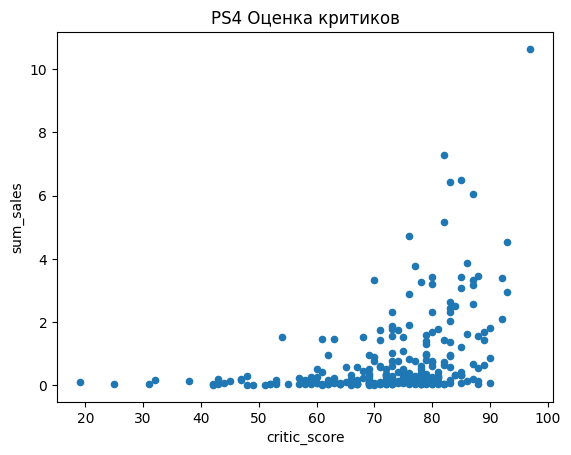

0.40588677465201317

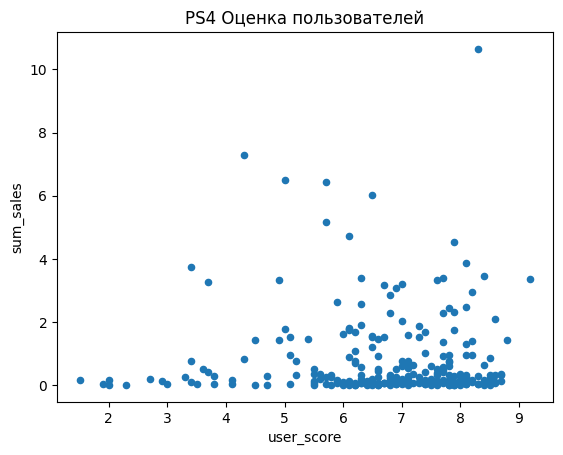

-0.03126053686666915

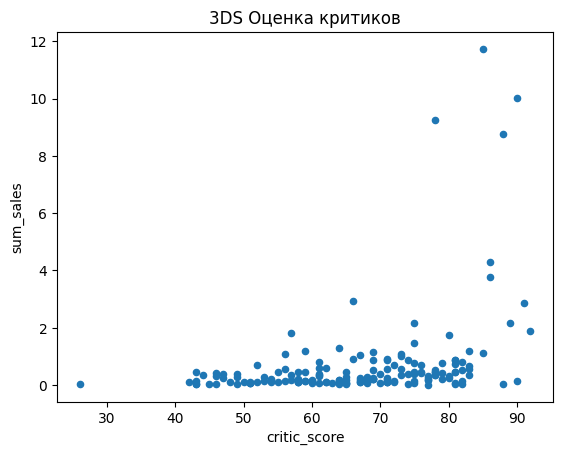

0.34995101794628497

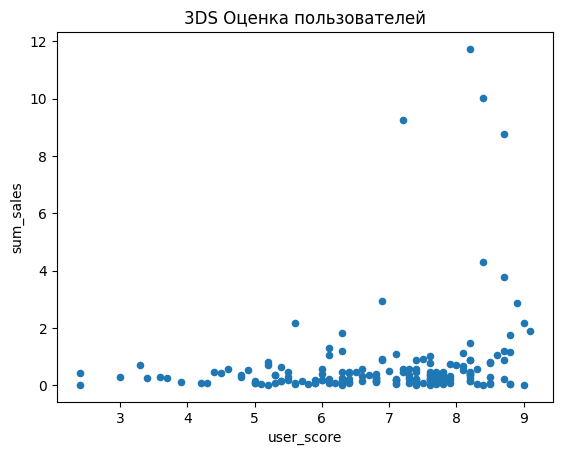

0.22430741424367473

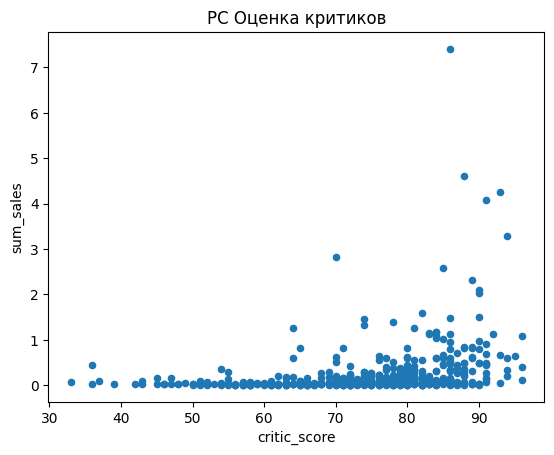

0.2793045283748232

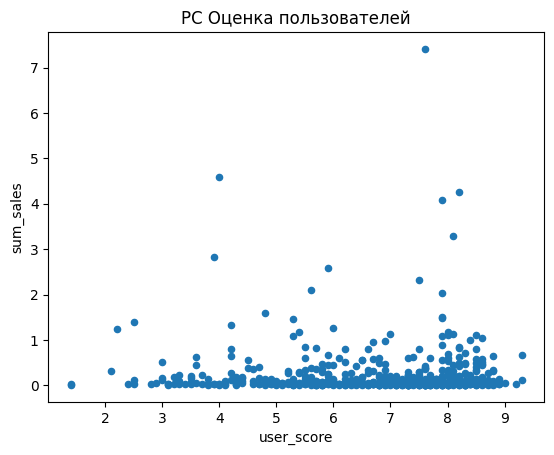

-0.02346549092164924

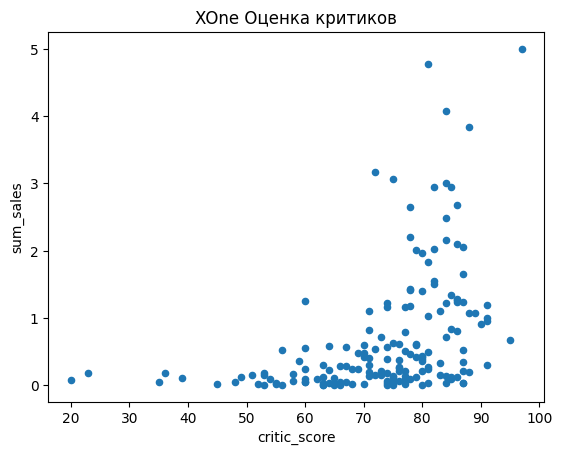

0.41720638309101793

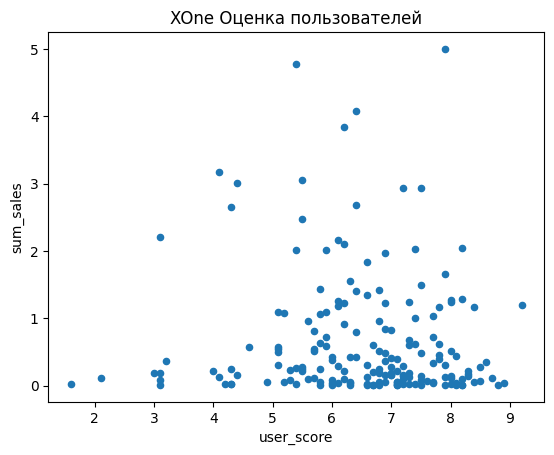

-0.0688039442559869

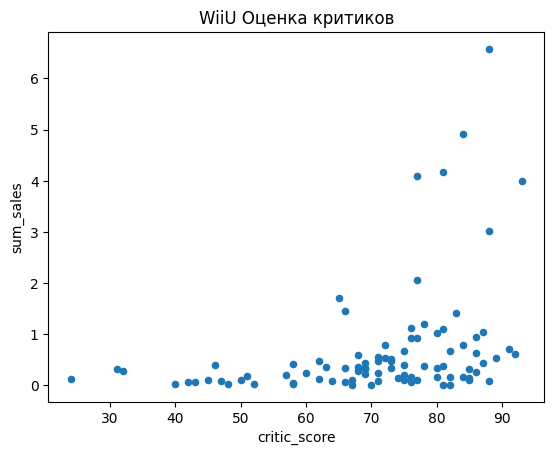

0.34706169744855475

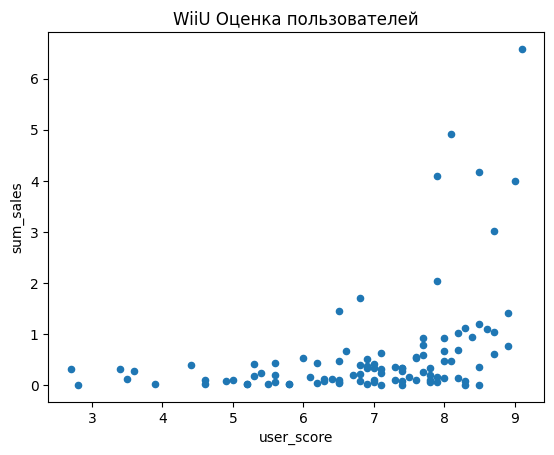

0.3992109927499889

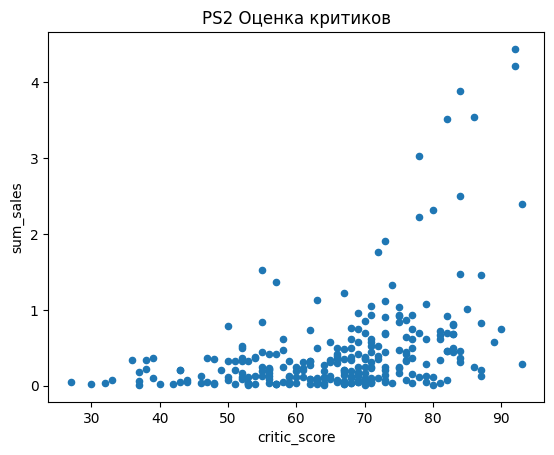

0.4258670670986992

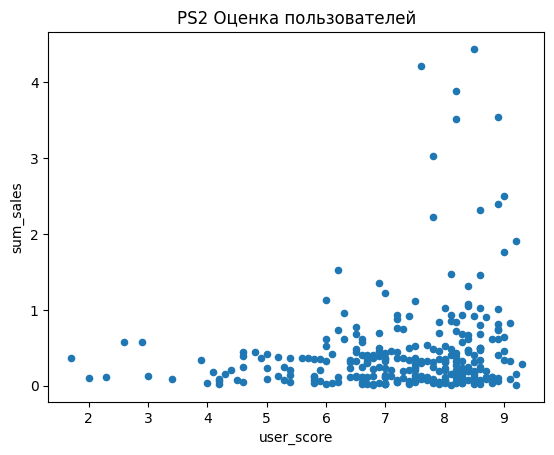

0.20279008821607622

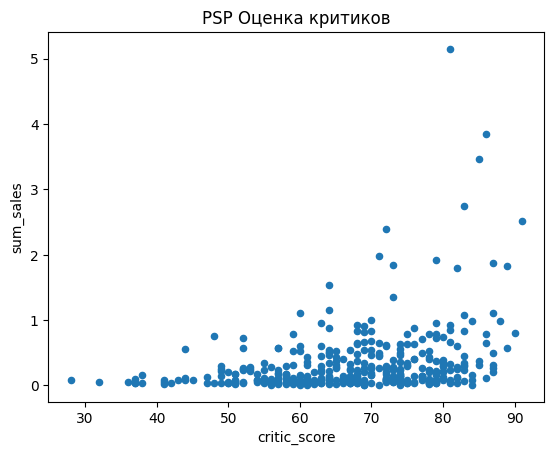

0.3167674251024186

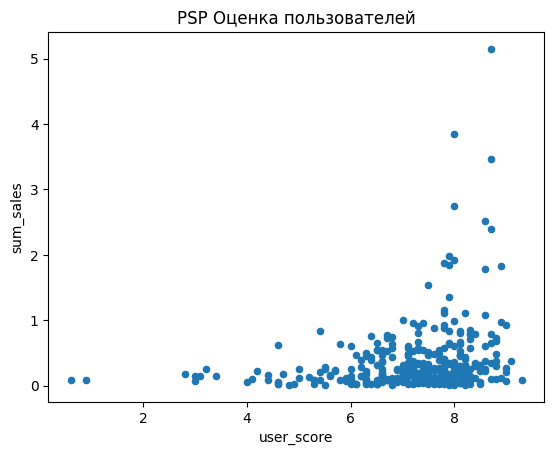

0.247141510851097

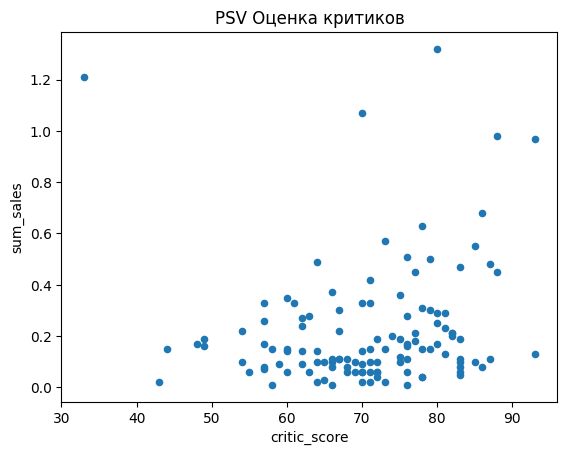

0.14031477845679824

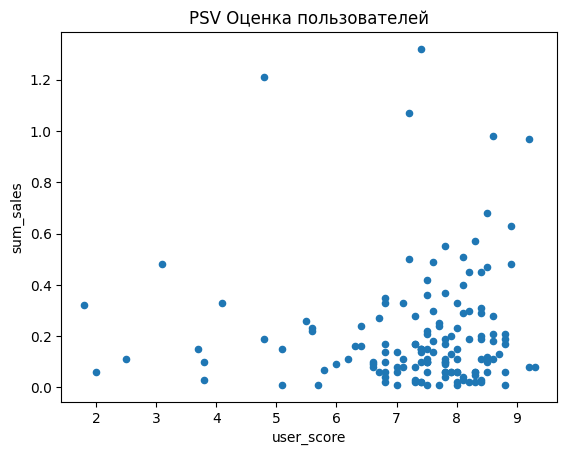

0.033302965546025735

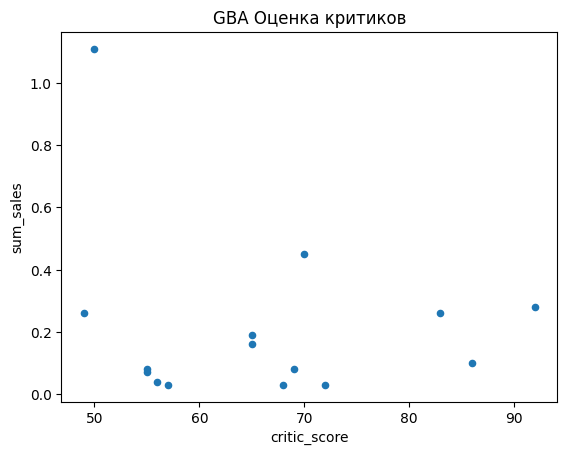

-0.18321746757817867

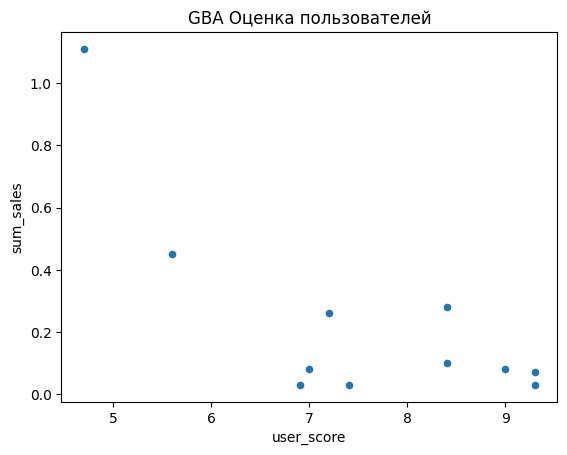

-0.7512755249362588

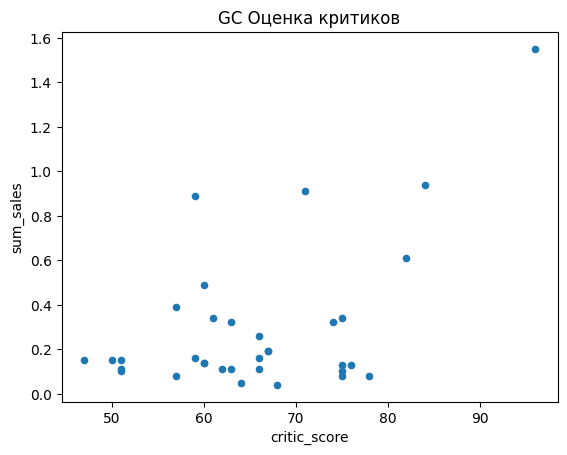

0.5174841513171146

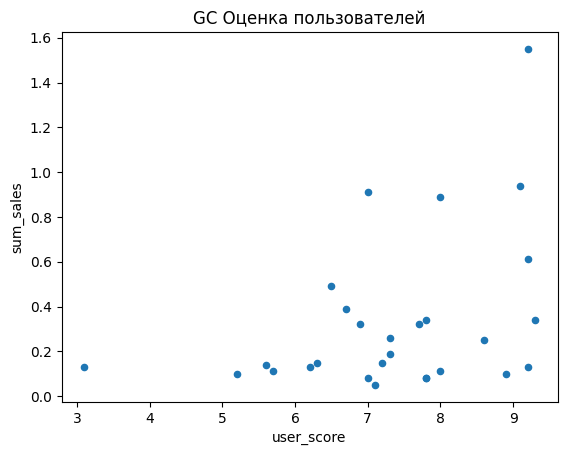

0.3912301331634768

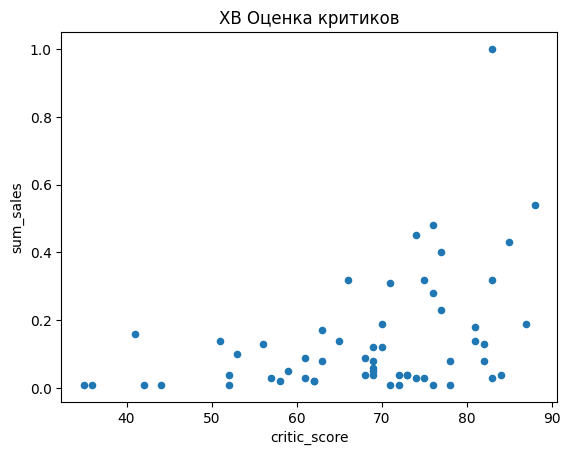

0.4153218137004168

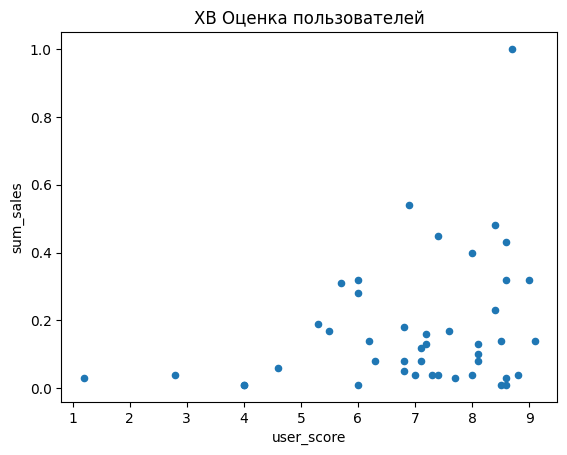

0.27982134345195037

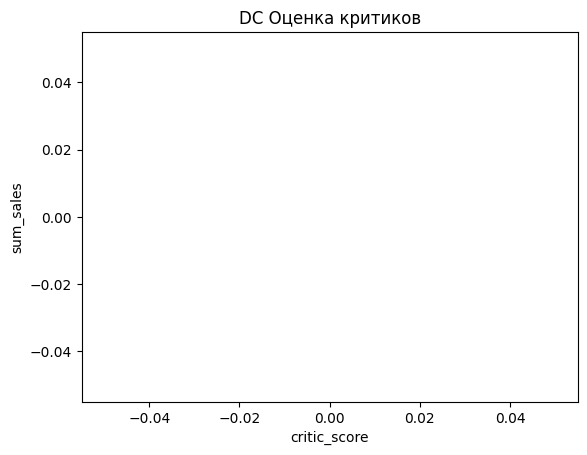

nan

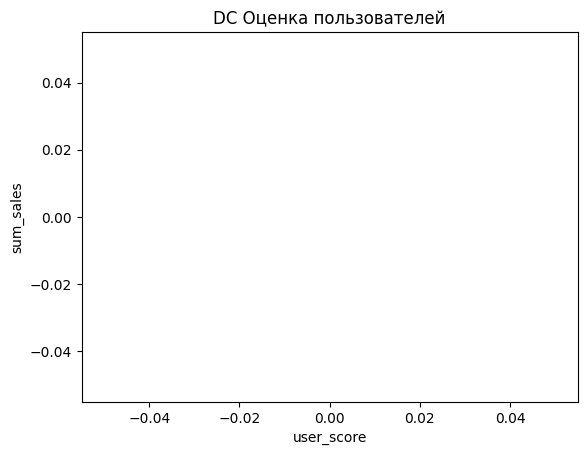

nan

In [27]:
for t in relevant_data['platform'].unique():
    relevant_data[relevant_data['platform'] == t].plot(y='sum_sales', x='critic_score', kind='scatter', title=t + ' Оценка критиков')
    plt.show()
    display(relevant_data[relevant_data['platform'] == t]['sum_sales'].corr(relevant_data[relevant_data['platform'] == t]['critic_score']))
    relevant_data[relevant_data['platform'] == t].plot(y='sum_sales', x='user_score', kind='scatter', title=t + ' Оценка пользователей')
    plt.show()
    display(relevant_data[relevant_data['platform'] == t]['sum_sales'].corr(relevant_data[relevant_data['platform'] == t]['user_score']))

Влияние оценок на продажи на других платформах имеет похожий результат: графики и корреляция не показывают прямой взаимосвязи между оценкой и продажами (обычно корреляция составляет от 0.1 до 0.5, что говорит о слабой связи между величинами)
При этом оценка критиков имеет большее влияние на продажи чем оценка пользователей.

### Прибыльность жанров

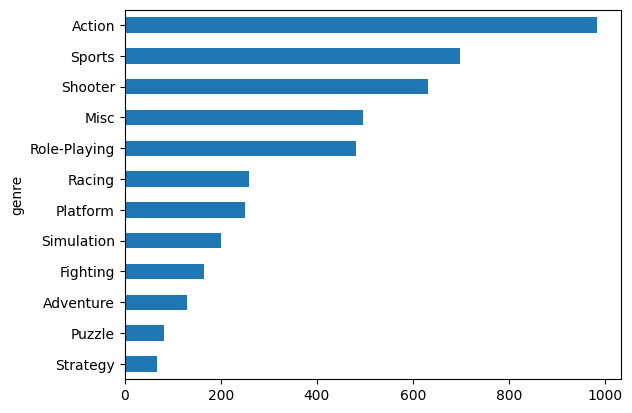

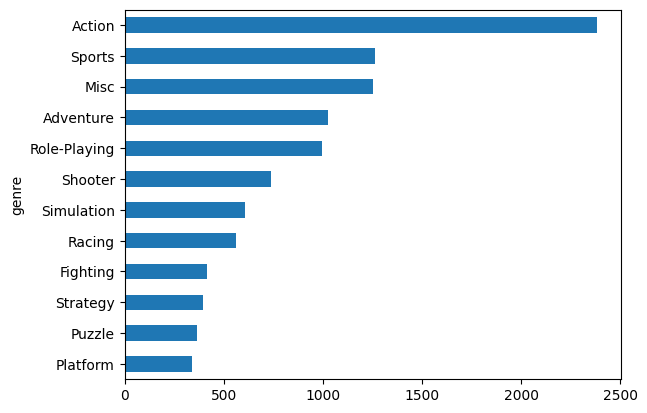

<AxesSubplot:ylabel='genre'>

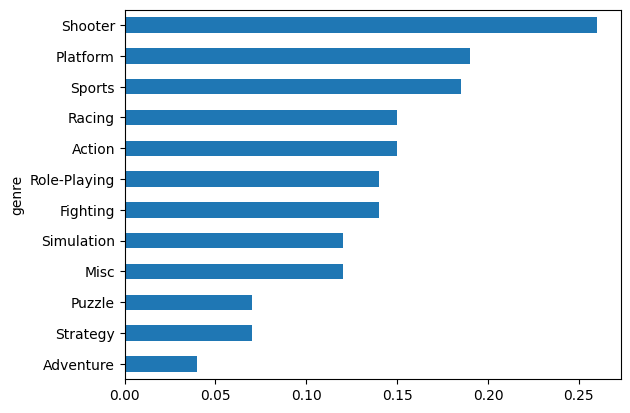

In [28]:
relevant_data.groupby('genre')['sum_sales'].agg('sum').sort_values().plot(kind='barh')
plt.show()
relevant_data.groupby('genre')['sum_sales'].agg('count').sort_values().plot(kind='barh')
plt.show()
relevant_data.groupby('genre')['sum_sales'].agg('median').sort_values().plot(kind='barh')

Самое большое количество игр выпущено в жанре action, этот же жанр имеет больше всего продаж, однако самая большая медиана продаж у жанра shooter.
Меньше всего выпущено игр жанра strategy. Самую меньшую сумму продаж имеет жанр platform (однако это скорее всего из-за небольшого количества выпущенных игр, медиана продаж этого жанра вторая по величине). Самую низкую медиану продаж имеет жанр adventure.

### Вывод по разделу 

* Самые репрезентативные годы для исследования это 2006-2016 год (они дают самую актуальную информацию для построения прогноза на 2017 год).
* Платформы с наибольшими суммарными продажами: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP, XB.
* Потенциально прибыльные платформы на 2017г: PSV, WiiU, XOne, PC, 3DS, PS4.
* Диаграммы размаха показывают что обычно игры продаются тиражем до 1 млн. штук.
* Продажи не сильно зависят от отзывов критиков и пользователей, при этом почти всегда оченка критиков имеет большее влияние на прожади чем оценка пользователей.
* Если медиану продаж считать основной метрикой прибыльности, то самым прибыльным является жанр shooter, а самым не прибыльным adventure.

## Портрет пользователя для каждого региона

### Топ-5 платформ по регионам

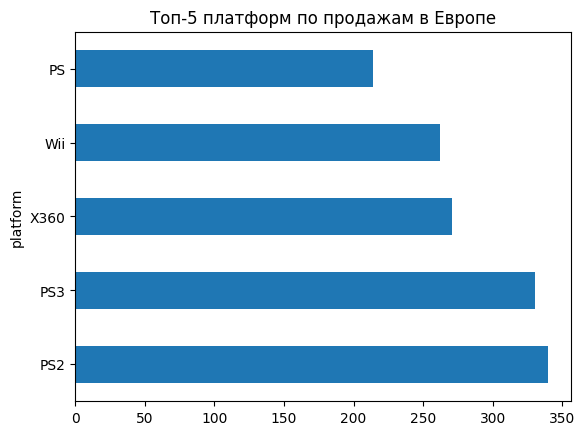

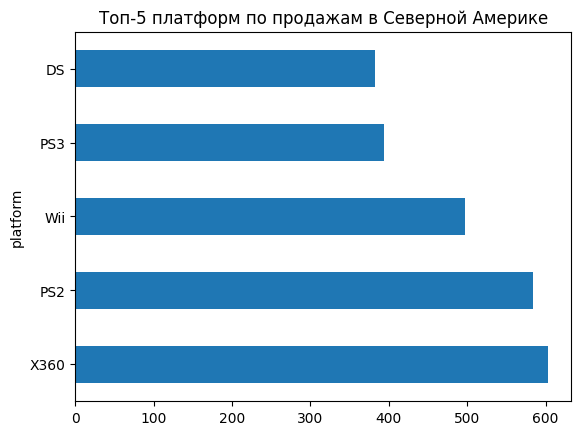

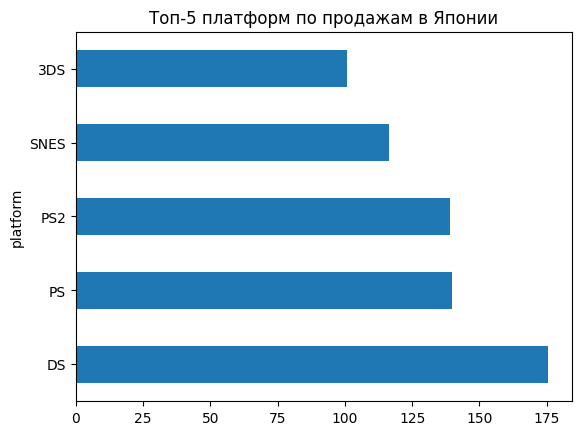

In [29]:
data.groupby('platform')['eu_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 платформ по продажам в Европе')
plt.show()
data.groupby('platform')['na_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 платформ по продажам в Северной Америке')
plt.show()
data.groupby('platform')['jp_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 платформ по продажам в Японии')
plt.show()

* Самые популярные платформы в:
    1. Японии - DS 
    2. Европе - PS2
    3. Северной Америке - Xbox-360

### Топ-5 жанров по регионам

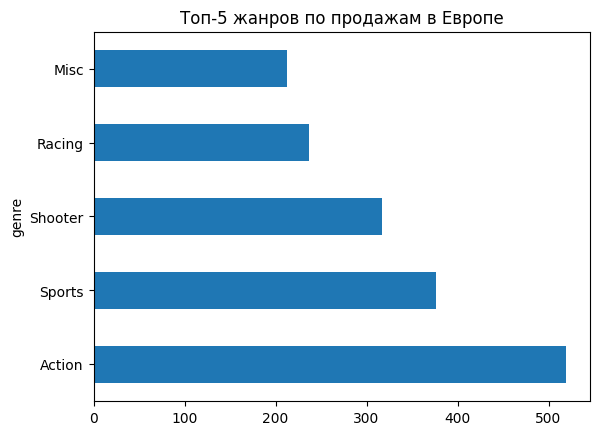

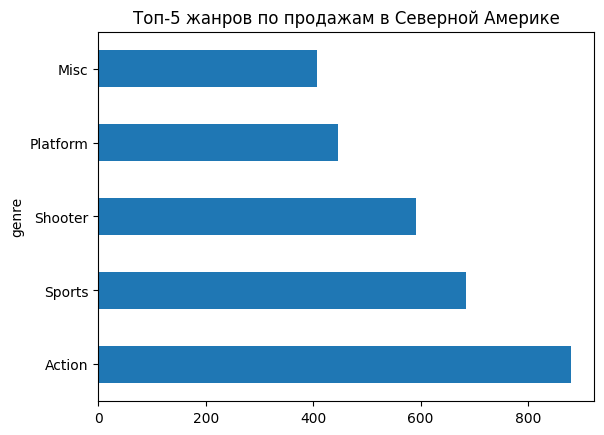

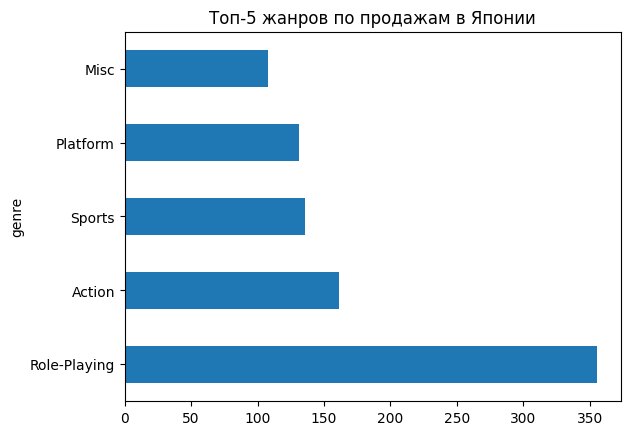

In [30]:
data.groupby('genre')['eu_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 жанров по продажам в Европе')
plt.show()
data.groupby('genre')['na_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 жанров по продажам в Северной Америке')
plt.show()
data.groupby('genre')['jp_sales'].agg('sum').sort_values(ascending=False)[:5].plot(kind='barh', title='Топ-5 жанров по продажам в Японии')
plt.show()

Вкусы пользователей из Северной Америки и Европы сильно совпадают в обоих регионах в топ-5 вошли action, sports, shooter и misc причем на одинаковых местах. action, sports и misc Также популярны и в Японии, но в этом регионе самым популярным жанром с большим отрывом оказался Role-Playing.

### Влияние рейтинга ESRB на продажи в отдельном регионе

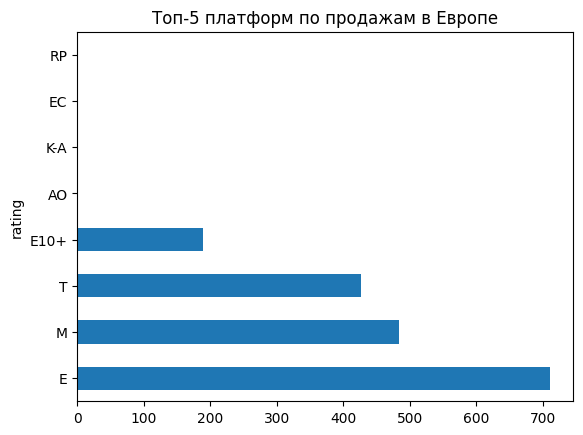

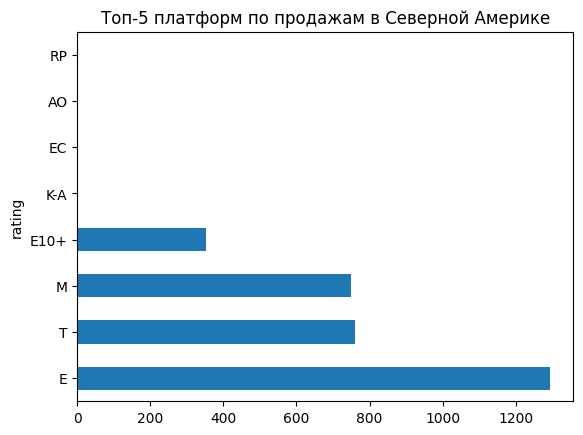

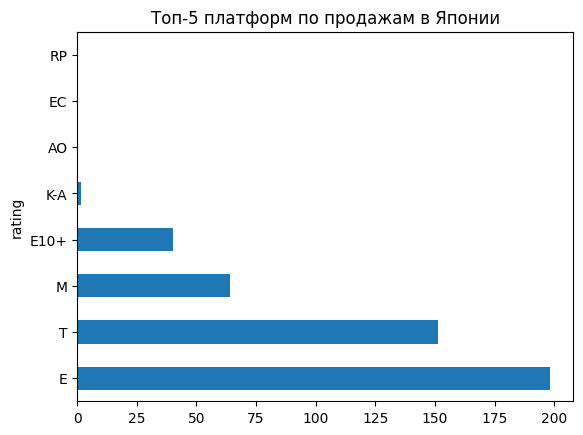

In [31]:
data.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', title='Топ-5 платформ по продажам в Европе')
plt.show()
data.groupby('rating')['na_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', title='Топ-5 платформ по продажам в Северной Америке')
plt.show()
data.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending=False).plot(kind='barh', title='Топ-5 платформ по продажам в Японии')
plt.show()

Рейтинг слабо отличается от региона к региону. Графики во всех доступных регионах очень похожи. Порядок популярности игры по рейтингу в порядке убывания: E, T, M E10+ (кроме европы: E, M, T E10+), остальные значения практически не пользуются спросом. 

### Вывод по разделу

* Платформы в разных регионах имеют разную популярность. В Европе самая популярная PS2, в Северной Америке - Xbox360 и в Японии - DS.
* Популярность жанров мало отличается между регионами. Самыми популярными являются action, sports и misc (В Японии самым популярным жанром в отлиции от остальных регионов, где он не вошел даже в топ-5, является role-playing).
* Рейтинг слабо отличается от региона к региону. Порядок популярности игры по рейтингу в порядке убывания примерно следующий: E, T, M E10+.

## Проверка гипотез

### Средние полльзовательские рейтинги платформ Xbox One и PC одинаковые.

* Нулевая гипотеза: Средние пользовательские рейтинги Xbox One равны пользовательским рейтингам PC.
* Альтернативная гипотеза: Средние пользовательские рейтинги Xbox One и PC не равны.

In [32]:
alpha = .05

results = st.ttest_ind(data[(data['platform'] == 'XOne') & ~(data['user_score'].isna())]['user_score'], 
                       data[(data['platform'] == 'PC') & ~(data['user_score'].isna())]['user_score'])

display(results.pvalue)
display(results.pvalue < alpha)

1.3896435533548819e-05

True

Мы можем с вероятностью более 99% допустить, что скорее всего средние пользовательские рейтинги Xbox One и PC не равны.

### Средние пользовательские рейтинги жанров Action и Sports разные.

* Нулевая гипотеза: Средние пользовательские рейтинги жанров action и sports равны
* Альтернативная гипотеза: Средние пользовательские рейтинги жанров action и sports не равны.

In [33]:
alpha = .05

results = st.ttest_ind(data[(data['genre'] == 'Action') & ~(data['user_score'].isna())]['user_score'], 
                       data[(data['genre'] == 'Sports') & ~(data['user_score'].isna())]['user_score'])

display(results.pvalue)
display(results.pvalue < alpha)

0.10406951359049141

False

Нельзя сказать что средние пользовательские рейтинги жанров action и sports не равны (нулевая гипотеза может выполняться с вероятностью примерно в 10%).

### Вывод по разделу

* Мы можем с вероятностью более 99% допустить, что скорее всего средние пользовательские рейтинги Xbox One и PC не равны.
* Нельзя сказать что средние пользовательские рейтинги жанров action и sports не равны (нулевая гипотеза может выполняться с вероятностью примерно в 10%).

## Общий вывод

### Предобработка данных:

* Типы в колонках year_of_release и user_score были изменены. 
* значения tbd в колонке user_store изменены на NaN
* В колонках user_score и year_of_release были изменены на float и int.
* В колонках genre, name пропуски были заполнены заглушкой 'unknown' в остальных колонках было решено пропуски оставить как есть.
* Добавлена колонка с суммой продаж по всем регионам.

### Исследовательский анализ:

* Подавляющее большенство игр было выпущено после 2001 года.
* Данные показали, что характерный срок появляются новые и исчезают старые платформы - примерно 10 лет.
* Самые популярные за все время платформы: PS2, X360, Wii, PS3, DS, PS, GBA, PS4, PSP, XB. 
* Потенциально прибыльные в 2017 году платформы: PSV, WiiU, XOne, PC, 3DS, PS4.
* Диаграмма размаха по глобальным продажам игр в разбивке по платформам показала, что обычно общие продажи игр ограничиваются 1 миллионом копий, значения выше на графиках отмечены как выбросы (скорее всего это единицы хорошо выстрелевших игр).
* Продажи не сильно зависят от отзывов критиков и пользователей, при этом почти всегда оченка критиков имеет большее влияние на прожади чем оценка пользователей.
* Если медиану продаж считать основной метрикой прибыльности, то самым прибыльным является жанр shooter, а самым не прибыльным adventure.

### Портрет пользователя по регионам

* Продажи не сильно зависят от отзывов критиков и пользователей, при этом почти всегда оченка критиков имеет большее влияние на прожади чем оценка пользователей.
* Если медиану продаж считать основной метрикой прибыльности, то самым прибыльным является жанр shooter, а самым не прибыльным adventure.
* Порядок популярности игры по рейтингу в порядке убывания примерно следующий: E, T, M E10+.

### Проверка гипотез

* Мы можем с вероятностью более 99% допустить, что скорее всего средние пользовательские рейтинги Xbox One и PC не равны.
* Нельзя сказать что средние пользовательские рейтинги жанров action и sports не равны (нулевая гипотеза может выполняться с вероятностью примерно в 10%).

### Рекомендации

* Основные критерии на которые следует обратить внимание:
    * самые популярные значения в возрастном рейтинге: E, T, M E10+, на остальные следует делать с тавку с большой опаской.
    * вкусы пользователей из Северной Америки и Европы сильно совпадают в обоих регионах в топ-5 вошли action, sports, shooter и misc причем на одинаковых местах. action, sports и misc Также популярны и в Японии, но в этом регионе самым популярным жанром с большим отрывом оказался Role-Playing.
    * платформы, которые по прогнозам будут прибыльны в следующем году: PSV, WiiU, XOne, PC, 3DS, PS4. (Возможно следует делать ставку именно за игры под эти платформы)
    * следует учитывать, что отзывы критиков могут оказать влияние на популярность игры
    * также стоит отметить, что жанр с самой большой медианой по продажам это shooter.
    * самые стабильные платформы: 'GBA', 'GC', 'XB', 'DC'
    * самые нестабильные платформы: 'Wii', 'DS', 'X360', 'PS3', 'PS4', '3DS', 'PC', 'PS2', 'PSP'.